In [3]:
from tqdm import tqdm
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

import medmnist
from medmnist import INFO, Evaluator

In [4]:
random_seed = 1764224
torch.manual_seed(random_seed)
np.random.seed(random_seed)

# B1

In [5]:
data_flag = 'breastmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [6]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)



pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = data.DataLoader(dataset=val_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /Users/chaselth/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/chaselth/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/chaselth/.medmnist/breastmnist.npz
Using downloaded and verified file: /Users/chaselth/.medmnist/breastmnist.npz


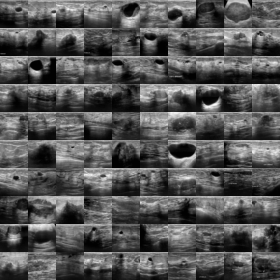

In [7]:
train_dataset.montage(length = 10)

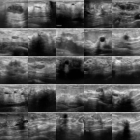

In [8]:
val_dataset.montage(length=5)

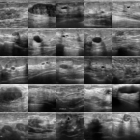

In [9]:
test_dataset.montage(length=5)

# B2.a

In [10]:
#define a function to get the data from dataset
def shape(x, y, dataset):
    for i in range(len(dataset)):
        x.append(dataset[i][0])
        y.append(dataset[i][1][0])
    for i in range(len(x)):
        x[i] = x[i].reshape(28*28).numpy()
    return x, y

In [11]:
#set the datalist
X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []
X_train, y_train = shape(X_train, y_train, train_dataset)
X_val, y_val = shape(X_val, y_val, val_dataset)
X_test, y_test = shape(X_test, y_test, test_dataset)

In [12]:
#set these parameter with 10 values
set_tol = [(i+1)/10000 for i in range(10)]
set_C = [i+1 for i in range(10)]
set_max_iter = [i*10+150 for i in range(10)]

In [13]:
#define a function to calculate the score
def getscore(thistol,thisC,thismax_iter):
    clf = LogisticRegression(random_state=random_seed, tol=thistol, C=thisC, max_iter=thismax_iter).fit(X_train, y_train)
    return clf.score(X_val, y_val)

In [14]:
#find the best tol
max_score = 0
for i in range(10):
    score = getscore(set_tol[i], 1, 200)
    if(max_score < score):
        max_score = score
        best_tol= set_tol[i]

/Users/chaselth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chaselth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [15]:
#find the best C
max_score = 0
for i in range(10):
    score = getscore(best_tol, set_C[i], 200)
    if(max_score < score):
        max_score = score
        best_C= set_C[i]

/Users/chaselth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chaselth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [16]:
#find the best max_iter
max_score = 0
for i in range(10):
    score = getscore(best_tol, best_C, set_max_iter[i])
    if(max_score < score):
        max_score = score
        best_max_iter= set_max_iter[i]

/Users/chaselth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chaselth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [17]:
print(best_tol, best_C, best_max_iter)

0.0001 3 160


In [18]:
#using the best parameters to set the LR classifer
clf = LogisticRegression(random_state=random_seed,
                         tol=best_tol,
                         C=best_C,
                         max_iter=best_max_iter).fit(X_train, y_train)

/Users/chaselth/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1])

In [48]:
def print_result(train, val, test):
    print(' M1) Trainning accuracy:',train,'\n',
          'M2) Validation accuracy:',val,'\n',
          'M3) Testing accuracy:',test)

In [49]:
print_result(clf.score(X_train, y_train),
             clf.score(X_val, y_val),
             clf.score(X_test, y_test))

 M1) Trainning accuracy: 0.9871794871794872 
 M2) Validation accuracy: 0.8589743589743589 
 M3) Testing accuracy: 0.7692307692307693


# B2.b

In [31]:
#define logistic regression model
class LogisticR(nn.Module):
    def __init__(self):
        super(LogisticR, self).__init__()
        self.lr = nn.Linear(28*28,2)

    def forward(self, x):
        x = x.reshape(-1, 28*28)
        x = self.lr(x)
        return x

In [45]:
model = LogisticR()

if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()

In [36]:
#define train function for finding the best parameters
def i_train():
    for epoch in range(NUM_EPOCHS):   
        model.train()
        for inputs, targets in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            
            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                loss = criterion(outputs, targets)
            else:
                targets = targets.squeeze().long()
                loss = criterion(outputs, targets)
                
            loss.backward()
            optimizer.step()

In [37]:
#definr test function to get the accuracy
def test(split):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    if split == 'train':
        data_loader = train_loader_at_eval
    elif split == 'test':
        data_loader = test_loader
    else:
        data_loader = val_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        
        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)
        
        return metrics[0]

In [38]:
#set these 3 paemeters with 5 values
set_lr = [(i+1)/1000 for i in range(5)]
set_eps = [(i+1)*(1e-08) for i in range(5)]
set_weight = [(i+1)/100 for i in range(5)]

In [39]:
#find the best learning rate
max_score = 0
for i in range(5):
    optimizer = optim.Adam(model.parameters(),lr=set_lr[i],weight_decay=0.01)
    i_train()
    this_score = test('val')
    if this_score > max_score:
        max_score = this_score
        best_lr = set_lr[i]

100%|██████████| 5/5 [00:00<00:00, 70.19it/s]


In [40]:
best_lr

0.004

In [41]:
#find the best weight
max_score = 0
for i in range(5):
    optimizer = optim.Adam(model.parameters(),lr=best_lr,weight_decay=set_weight[i])
    i_train()
    this_score = test('val')
    if this_score > max_score:
        max_score = this_score
        best_weight = set_weight[i]

100%|██████████| 5/5 [00:00<00:00, 71.92it/s]


In [42]:
best_weight

0.05

In [43]:
#find the best eps
max_score = 0
for i in range(5):
    optimizer = optim.Adam(model.parameters(),lr=best_lr,weight_decay=best_weight,eps=set_eps[i])
    i_train()
    this_score = test('val')
    if this_score > max_score:
        max_score = this_score
        best_eps = set_eps[i]

100%|██████████| 5/5 [00:00<00:00, 72.50it/s]


In [44]:
best_eps

5e-08

In [46]:
#set the optimizer using the 3 best parameters found above
optimizer = optim.Adam(model.parameters(),lr=best_lr,weight_decay=best_weight,eps=best_eps)

In [47]:
i_train()

100%|██████████| 5/5 [00:00<00:00, 89.59it/s]


In [50]:
print_result(test('train'),test('val'),test('test'))

 M1) Trainning accuracy: 0.7704635739007382 
 M2) Validation accuracy: 0.786967418546366 
 M3) Testing accuracy: 0.7748538011695907


# B3.a

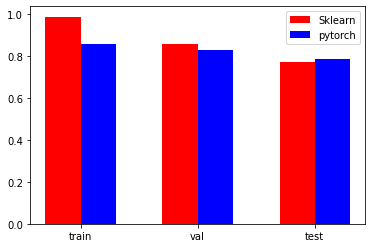

In [34]:
sklearn_result = [clf.score(X_train, y_train),clf.score(X_val, y_val),clf.score(X_test, y_test)]
pytorch_result = [test('train'),test('val'),test('test')]
x_label = ['train','val','test']
bar_width = 0.3
index_sklearn = np.arange(3)
index_pytorch = index_sklearn + bar_width

plt.bar(index_sklearn, height=sklearn_result, width=bar_width, color='r', label='Sklearn')
plt.bar(index_pytorch, height=pytorch_result, width=bar_width, color='b', label='pytorch')

plt.xticks(index_sklearn + bar_width/2, x_label)

plt.legend()
plt.show()

# B3.b

#### Describe at least two observations interesting to you. (B3.b)
1: Using sklearn to train a logistic regression mdoel seems easier than using pytorch as the logistic regression means one layer of a CNN in pytorch.  
2: Using pytorch should use optimizer which I choose to find 3 best parameters in, and the optimizer can help making small loss while sklearn doesn't use optimizer.

# C1

In [51]:
data_flag = 'octmnist'
download = True

NUM_EPOCHS = 3
BATCH_SIZE = 128
lr = 0.001

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])

DataClass = getattr(medmnist, info['python_class'])

In [52]:
# preprocessing
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

# load the data
train_dataset = DataClass(split='train', transform=data_transform, download=download)
test_dataset = DataClass(split='test', transform=data_transform, download=download)
val_dataset = DataClass(split='val', transform=data_transform, download=download)


pil_dataset = DataClass(split='train', download=download)

# encapsulate data into dataloader form
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader_at_eval = data.DataLoader(dataset=train_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
test_loader = data.DataLoader(dataset=test_dataset, batch_size=2*BATCH_SIZE, shuffle=False)
val_loader = data.DataLoader(dataset=val_dataset, batch_size=2*BATCH_SIZE, shuffle=False)

Using downloaded and verified file: /Users/chaselth/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/chaselth/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/chaselth/.medmnist/octmnist.npz
Using downloaded and verified file: /Users/chaselth/.medmnist/octmnist.npz


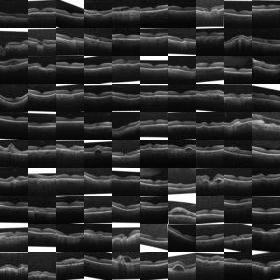

In [53]:
train_dataset.montage(length=10)

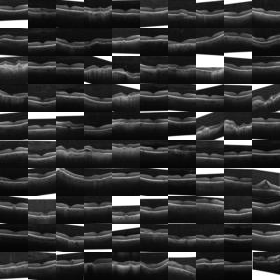

In [54]:
val_dataset.montage(length=10)

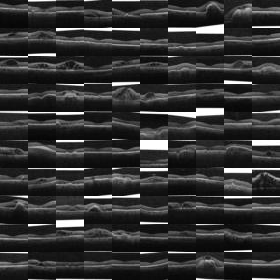

In [55]:
test_dataset.montage(length=10)

# C2.a

In [56]:
#define a tain function for finding the best model
def get_train(model):
    for epoch in range(NUM_EPOCHS):
        model.train()
        for inputs, targets in tqdm(train_loader):
            optimizer.zero_grad()
            outputs = model(inputs)
            
            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                loss = criterion(outputs, targets)
            else:
                targets = targets.squeeze().long()
                loss = criterion(outputs, targets)
            
            loss.backward()
            optimizer.step()

In [57]:
#define a function to get the accuracy
def test(split, model):
    model.eval()
    y_true = torch.tensor([])
    y_score = torch.tensor([])
    
    if split == 'train':
        data_loader = train_loader_at_eval
    elif split == 'test':
        data_loader = test_loader
    else:
        data_loader = val_loader

    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)

            if task == 'multi-label, binary-class':
                targets = targets.to(torch.float32)
                outputs = outputs.softmax(dim=-1)
            else:
                targets = targets.squeeze().long()
                outputs = outputs.softmax(dim=-1)
                targets = targets.float().resize_(len(targets), 1)

            y_true = torch.cat((y_true, targets), 0)
            y_score = torch.cat((y_score, outputs), 0)

        y_true = y_true.numpy()
        y_score = y_score.detach().numpy()
        
        evaluator = Evaluator(data_flag, split)
        metrics = evaluator.evaluate(y_score)
        
        return metrics[0]

In [58]:
if task == "multi-label, binary-class":
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()
    
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

In [106]:
#Net1-3 with 2 conv2d and 2 fc
class Net_size2_1(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net_size2_1, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU())
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=2))
        
        self.fc1 = nn.Sequential(
            nn.Linear(32 * 2 * 2, 128),
            nn.ReLU())
        
        self.fc2 = nn.Sequential(
            nn.Linear(128, num_classes))
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [107]:
class Net_size2_2(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net_size2_2, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=3, stride=4),
            nn.BatchNorm2d(64),
            nn.ReLU())
        
        self.fc1 = nn.Sequential(
            nn.Linear(64 * 6 * 6, 128),
            nn.ReLU())
        
        self.fc2 = nn.Sequential(
            nn.Linear(128, num_classes))
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [108]:
class Net_size2_3(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net_size2_3, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=5, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 64, kernel_size=5, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=2))
        
        self.fc1 = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU())
        
        self.fc2 = nn.Sequential(
            nn.Linear(128, num_classes))
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [109]:
#model_a_b: 'a' means the size of model is 2 conv2d and 2 fc, 'b' means the number of model
model_2_1 = Net_size2_1(in_channels=n_channels, num_classes=n_classes)
model_2_2 = Net_size2_2(in_channels=n_channels, num_classes=n_classes)
model_2_3 = Net_size2_3(in_channels=n_channels, num_classes=n_classes)

In [113]:
#train the model on training set
import time

NUM_EPOCHS = 3

start = time.time()
get_train(model_2_1)
end = time.time()
time_1 = end - start
print('Time for Net1:', time_1)

start = time.time()
get_train(model_2_2)
end = time.time()
time_2 = end - start
print('Time for Net2:', time_2)

start = time.time()
get_train(model_2_3)
end = time.time()
time_3 = end - start
print('Time for Net3:', time_3)

  0%|          | 3/762 [00:00<00:32, 23.62it/s]

Time for Net1: 49.988434076309204


  0%|          | 2/762 [00:00<00:48, 15.59it/s]

Time for Net2: 89.01310706138611


100%|██████████| 762/762 [00:51<00:00, 14.92it/s]

Time for Net3: 153.4291341304779


In [114]:
#choose the model that has the best accuracy on validation set
test('val', model_2_1), test('val', model_2_2), test('val', model_2_3)

(0.5349901815199893, 0.4861582451890287, 0.5243268474773098)

In [118]:
def print_result(train, test, val, time):
    print(' M1) Training accuracy:',train,'\n',
          'M2) Validation accuracy:',val,'\n',
          'M3) Testing accuracy:',test,'\n',
          'M4) Training time:',time)

In [172]:
model_1_train = test('train', model_2_1)
model_1_val = test('val', model_2_1)
model_1_test = test('test', model_2_1)
print_result(model_1_train,
             model_1_val,
             model_1_test,
             time_1)

 M1) Training accuracy: 0.5255368387835488 
 M2) Validation accuracy: 0.5352386666666666 
 M3) Testing accuracy: 0.5349901815199893 
 M4) Training time: 437.920597076416


# C2.b

In [158]:
#define Net 1-3 with 3 conv2d and 3 fc
class Net_size3_1(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net_size3_1, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3),
            nn.BatchNorm2d(16),
            nn.ReLU())
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3),
            nn.BatchNorm2d(32),
            nn.ReLU())
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=2))
        
        self.fc1 = nn.Sequential(
            nn.Linear(64 * 10 * 10, 64),
            nn.ReLU())
        
        self.fc2 = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU())
        
        self.fc3 = nn.Sequential(
            nn.Linear(32, num_classes))
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [159]:
class Net_size3_2(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net_size3_2, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=5),
            nn.BatchNorm2d(16),
            nn.ReLU())
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5),
            nn.BatchNorm2d(32),
            nn.ReLU())
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4))
        
        self.fc1 = nn.Sequential(
            nn.Linear(64 * 4 * 4, 128),
            nn.ReLU())
        
        self.fc2 = nn.Sequential(
            nn.Linear(128, 32),
            nn.ReLU())
        
        self.fc3 = nn.Sequential(
            nn.Linear(32, num_classes))
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [160]:
class Net_size3_3(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(Net_size3_3, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU())
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=1, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU())
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=4, stride=4))
        
        self.fc1 = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU())
        
        self.fc2 = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU())
        
        self.fc3 = nn.Sequential(
            nn.Linear(64, num_classes))
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        #print(x.shape)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [161]:
#model_a_b: 'a' means the size of model is 2 conv2d and 2 fc, 'b' means the number of model
model_3_1 = Net_size3_1(in_channels=n_channels, num_classes=n_classes)
model_3_2 = Net_size3_2(in_channels=n_channels, num_classes=n_classes)
model_3_3 = Net_size3_3(in_channels=n_channels, num_classes=n_classes)

In [168]:
start = time.time()
get_train(model_3_1)
end = time.time()
time_1 = end - start
print('Time for Net1:',time_1)

start = time.time()
get_train(model_3_2)
end = time.time()
time_2 = end - start
print('Time for Net2:',time_2)

start = time.time()
get_train(model_3_3)
end = time.time()
time_3 = end - start
print('Time for Net3:',time_3)

  0%|          | 0/762 [00:00<?, ?it/s]

Time for Net1: 437.920597076416


  0%|          | 3/762 [00:00<00:30, 25.10it/s]

Time for Net2: 468.2459979057312


100%|██████████| 762/762 [00:25<00:00, 29.69it/s]

Time for Net3: 77.19317889213562


In [169]:
#choose the best model
test('val', model_3_1), test('val', model_3_2), test('val', model_3_3)

(0.5319710161251565, 0.4889646542753627, 0.5008892459663714)

In [173]:
model_2_train = test('train', model_3_1)
model_2_val = test('val', model_3_1)
model_2_test = test('test', model_3_1)
print_result(model_2_train,
             model_2_val,
             model_2_test,
             time_1)

 M1) Training accuracy: 0.5286087838930995 
 M2) Validation accuracy: 0.51128 
 M3) Testing accuracy: 0.5319710161251565 
 M4) Training time: 437.920597076416


# C3.c

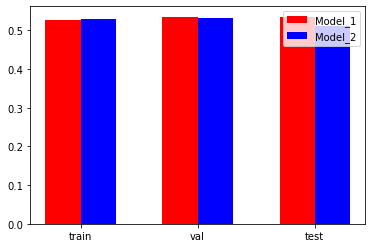

In [174]:
model_1_result = [model_1_train, model_1_val, model_1_test]
model_2_result = [model_2_train, model_2_val, model_2_test]
x_label = ['train','val','test']
bar_width = 0.3
index_1 = np.arange(3)
index_2 = index_1 + bar_width

plt.bar(index_1, height=model_1_result, width=bar_width, color='r', label='Model_1')
plt.bar(index_2, height=model_2_result, width=bar_width, color='b', label='Model_2')

plt.xticks(index_1 + bar_width/2, x_label)

plt.legend()
plt.show()

# C3.d

#### Describe at least two observations interesting to you.(C3.d)
1: I have changed the parameters in each CNN to make the time of calculation shorter since I didn't ues GPU to boost the calculation. And I found the maxpool can help make the data smaller. But may be the maxpool is so big it makes the accuracy lower.  
2: Before the code is runnable, it always occur the error because of the dimension when it goes to the fully connect layer, so I put a print to show the shape of the x to get the dimension and set the dimension for the first fc layer that makes the input correct.

# D1.a

In [202]:
import torchvision
from torchvision.transforms import ToTensor
import pandas as pd

data_path = './fashion-mnist-master/data/fashion'

testset = torchvision.datasets.FashionMNIST(root=data_path,
                                        train=False,
                                        download=True, 
                                        transform=ToTensor())

In [203]:
#choose sneaker and bag class as the dataset
test_sneaker = []
test_bag = []
test_data = [] #sneaker class and bag class
for test_image, test_label in testset:
    x = np.transpose(test_image, (1,2,0)).reshape(28,28)
    if test_label == 7:
        test_sneaker.append(x.numpy())
        test_data.append(x.numpy())
    if test_label == 8:
        test_bag.append(x.numpy())
        test_data.append(x.numpy())
test_sneaker = np.array(test_sneaker)
test_bag = np.array(test_bag)
test_data = np.array(test_data)

In [204]:
from sklearn.decomposition import PCA

#apple PCA on each class
pca_sneaker = PCA()
pca_bag = PCA()
pca_test_data = PCA()
sneaker = pca_sneaker.fit_transform(test_sneaker.reshape(1000, 28*28))
bag = pca_bag.fit_transform(test_bag.reshape(1000, 28*28))
test = pca_test_data.fit_transform(test_data.reshape(2000, 28*28))


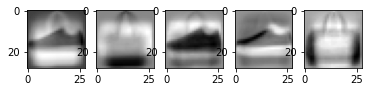

In [206]:
#show top 5 eigenvectors as images after applying PCA on both sneaker and bag class
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(pca_test_data.components_[i].reshape(28,28), cmap='gray')

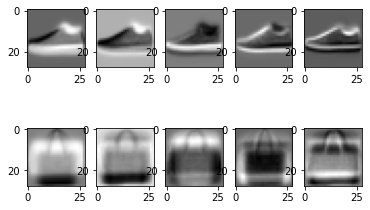

In [180]:
#show top 5 eigenvectors as images after applying PCA on each class
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(pca_sneaker.components_[i].reshape(28,28), cmap='gray')
    plt.subplot(2, 5, i+6)
    plt.imshow(pca_bag.components_[i].reshape(28,28), cmap='gray')

# D1.b

In [214]:
pca_sneaker = PCA(30)
pca_bag = PCA(30)

sneaker = pca_sneaker.fit_transform(test_sneaker.reshape(1000, 28*28))
bag = pca_bag.fit_transform(test_bag.reshape(1000, 28*28))

sneaker_inv_proj = pca_sneaker.inverse_transform(sneaker)
sneaker_proj_img = np.reshape(sneaker_inv_proj, (1000,28,28))

bag_inv_proj = pca_bag.inverse_transform(bag)
bag_proj_img = np.reshape(bag_inv_proj, (1000,28,28))

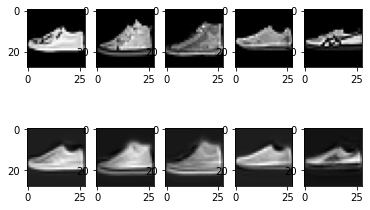

In [215]:
#reconstruct 5 images from sneaker class
for i in range(5):
    random_index = np.random.randint(0, 999)
    plt.subplot(2, 5, i+1)
    plt.imshow(test_sneaker[random_index], cmap='gray')
    plt.subplot(2, 5, i+6)
    plt.imshow(sneaker_proj_img[random_index], cmap='gray')

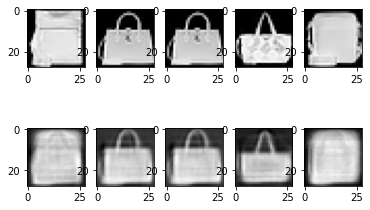

In [216]:
#reconstruct 5 images from bag class
for i in range(5):
    random_index = np.random.randint(0, 999)
    plt.subplot(2, 5, i+1)
    plt.imshow(test_bag[random_index], cmap='gray')
    plt.subplot(2, 5, i+6)
    plt.imshow(bag_proj_img[random_index], cmap='gray')

# D1.c

In [184]:
pca_2d = PCA(2)
sneaker_2d = pca_2d.fit_transform(test_sneaker.reshape(1000, 28*28))
bag_2d = pca_2d.fit_transform(test_bag.reshape(1000, 28*28))

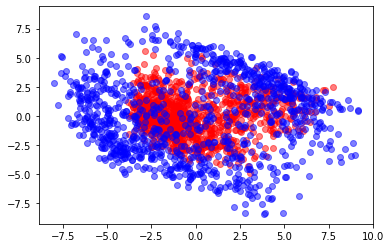

In [186]:
plt.scatter(sneaker_2d[:,0], sneaker_2d[:,1], c='r', alpha=0.5)
plt.scatter(bag_2d[:,0], bag_2d[:,1], c='b', alpha=0.5)

# D1.d

In [187]:
from sklearn.cluster import SpectralClustering
clustering_sneaker = SpectralClustering(n_clusters=2,
                                        random_state=random_seed).fit(sneaker_2d)
clustering_bag = SpectralClustering(n_clusters=2,
                                        random_state=random_seed).fit(bag_2d)

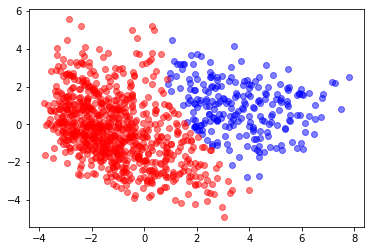

In [188]:
for i in range(1000):
    plt.scatter(sneaker_2d[i, 0], sneaker_2d[i, 1], c='r' if clustering_sneaker.labels_[i] == 0 else 'b', alpha=0.5)

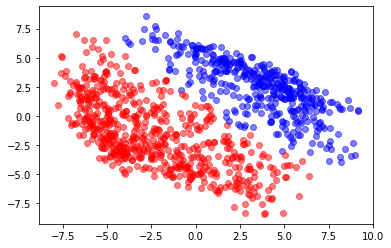

In [189]:
for i in range(1000):
    plt.scatter(bag_2d[i, 0], bag_2d[i, 1], c='r' if clustering_bag.labels_[i] == 0 else 'b', alpha=0.5)

# D1.e

In [190]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(1, 16, 3),
            nn.ReLU(),
            nn.Conv2d(16, 16, 3),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3),
            nn.ReLU(),
            nn.Conv2d(32, 64, 5)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 5),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 32, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 16, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3),
            nn.Sigmoid()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [191]:
trainset = []
for test_image, test_label in testset:
    if test_label == 7 or test_label == 8:
        trainset.append([test_image, test_label])

In [192]:
model_fashion = Autoencoder()
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model_fashion.parameters(), lr=0.001, weight_decay=1e-5)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [198]:
outputs = []
print_list = []
for epoch in range(20):
    for data in tqdm(train_loader):
        img, label = data
        optimizer.zero_grad()
        recon = model_fashion(img)
        loss = criterion(recon, img)
        loss.backward()
        optimizer.step()            
        print_list.append('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, img, recon),)
print(*print_list, sep = '\n')

100%|██████████| 32/32 [00:53<00:00,  1.67s/it]

Epoch:1, Loss:0.0082
Epoch:1, Loss:0.0065
Epoch:1, Loss:0.0071
Epoch:1, Loss:0.0074
Epoch:1, Loss:0.0082
Epoch:1, Loss:0.0072
Epoch:1, Loss:0.0075
Epoch:1, Loss:0.0082
Epoch:1, Loss:0.0071
Epoch:1, Loss:0.0087
Epoch:1, Loss:0.0071
Epoch:1, Loss:0.0077
Epoch:1, Loss:0.0065
Epoch:1, Loss:0.0076
Epoch:1, Loss:0.0074
Epoch:1, Loss:0.0083
Epoch:1, Loss:0.0072
Epoch:1, Loss:0.0066
Epoch:1, Loss:0.0067
Epoch:1, Loss:0.0068
Epoch:1, Loss:0.0067
Epoch:1, Loss:0.0056
Epoch:1, Loss:0.0068
Epoch:1, Loss:0.0070
Epoch:1, Loss:0.0065
Epoch:1, Loss:0.0072
Epoch:1, Loss:0.0060
Epoch:1, Loss:0.0068
Epoch:1, Loss:0.0084
Epoch:1, Loss:0.0068
Epoch:1, Loss:0.0065
Epoch:1, Loss:0.0069
Epoch:2, Loss:0.0088
Epoch:2, Loss:0.0066
Epoch:2, Loss:0.0068
Epoch:2, Loss:0.0068
Epoch:2, Loss:0.0070
Epoch:2, Loss:0.0065
Epoch:2, Loss:0.0068
Epoch:2, Loss:0.0065
Epoch:2, Loss:0.0079
Epoch:2, Loss:0.0077
Epoch:2, Loss:0.0072
Epoch:2, Loss:0.0058
Epoch:2, Loss:0.0062
Epoch:2, Loss:0.0058
Epoch:2, Loss:0.0055
Epoch:2, Loss

# D2

#### Describe at least two observations interesting to you from D1 above.
1: I misunderstanded the first question so I just show both of two sulotions, one is apply PCA on 2 classes separatly and another is apply PCA on 2 classes together. It shows the image of both situation after PCA applied.  
2: The loss looks great, may be just luck. And when it comes close to the final epoch the time for the calculation began to get longer.